In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data'
column_names = ['letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
data = pd.read_csv(url, header=None, names=column_names)

In [4]:
# Preprocess the dataset
X = data.drop('letter', axis=1)
y = data['letter']

In [5]:
# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Create the DNN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(16,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
500/500 [==============================] - 3s 3ms/step - loss: 1.9168 - accuracy: 0.4733 - val_loss: 1.2086 - val_accuracy: 0.6450
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 1.0287 - accuracy: 0.7138 - val_loss: 0.9212 - val_accuracy: 0.7427
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 0.8400 - accuracy: 0.7642 - val_loss: 0.7827 - val_accuracy: 0.7772
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 0.7323 - accuracy: 0.7922 - val_loss: 0.7010 - val_accuracy: 0.8010
Epoch 5/10
500/500 [==============================] - 1s 3ms/step - loss: 0.6584 - accuracy: 0.8067 - val_loss: 0.6337 - val_accuracy: 0.8213
Epoch 6/10
500/500 [==============================] - 3s 7ms/step - loss: 0.5987 - accuracy: 0.8211 - val_loss: 0.5860 - val_accuracy: 0.8282
Epoch 7/10
500/500 [==============================] - 2s 5ms/step - loss: 0.5497 - accuracy: 0.8356 - val_loss: 0.5426 - val_accuracy: 0.8418
Epoch 

In [10]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

125/125 - 0s - loss: 0.4430 - accuracy: 0.8615 - 159ms/epoch - 1ms/step
Test Loss: 0.44302335381507874
Test Accuracy: 0.8615000247955322


--------------------------------------------------------------------------------

In [11]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import metrics

11490434/11490434 [==============================] - 0s 0us/step


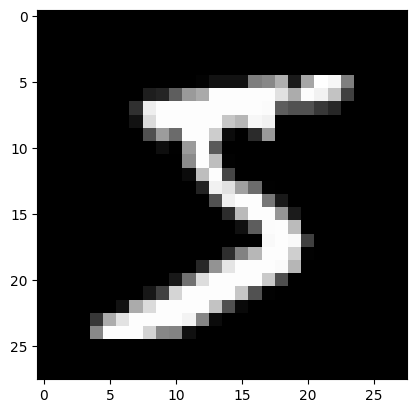

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_train[0], cmap='gray') # imshow() function which simply displays an image.
plt.show()

In [13]:
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [14]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= 255 # Each image has Intensity from 0 to 255
x_test /= 255

In [15]:
num_classes = 10
y_train = np.eye(num_classes)[y_train] 

In [16]:
y_test = np.eye(num_classes)[y_test] 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) 
model.add(Dropout(0.2)) 
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax')) # 10 neurons ie output node in the output layer.

In [17]:
# Compile the model
model.compile(loss='categorical_crossentropy', # for a multi-class classification problem
optimizer=RMSprop(),
metrics=['accuracy'])

In [18]:
# Train the model
batch_size = 128 # batch_size argument is passed to the layer to define a batch size for the inputs.
epochs = 20
history = model.fit(x_train, y_train,
batch_size=batch_size,
epochs=epochs,
verbose=1, # verbose=1 will show you an animated progress bar eg. [==========]
validation_data=(x_test, y_test)) 
# 60000image/128=469 batch each

Epoch 1/20
469/469 [==============================] - 11s 22ms/step - loss: 0.2511 - accuracy: 0.9227 - val_loss: 0.1411 - val_accuracy: 0.9546
Epoch 2/20
469/469 [==============================] - 10s 22ms/step - loss: 0.1035 - accuracy: 0.9683 - val_loss: 0.0826 - val_accuracy: 0.9741
Epoch 3/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0739 - accuracy: 0.9772 - val_loss: 0.0835 - val_accuracy: 0.9753
Epoch 4/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0603 - accuracy: 0.9812 - val_loss: 0.0640 - val_accuracy: 0.9814
Epoch 5/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0478 - accuracy: 0.9854 - val_loss: 0.0650 - val_accuracy: 0.9815
Epoch 6/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0398 - accuracy: 0.9876 - val_loss: 0.0665 - val_accuracy: 0.9812
Epoch 7/20
469/469 [==============================] - 11s 24ms/step - loss: 0.0334 - accuracy: 0.9894 - val_loss: 0.0701 - val_accuracy: 

In [19]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.0799582451581955
Test accuracy: 0.9854000210762024
